In [1]:
import astropy.constants as c
import numpy as np
import matplotlib.pyplot as plt

au = c.au.cgs.value
MS = c.M_sun.cgs.value
RS = c.R_sun.cgs.value
pc = c.M_sun.cgs.value
kb = c.k_B.cgs.value
mu = 2.3
mp = c.m_p.cgs.value
G  = c.G.cgs.value

plt.style.use('serif_style')

In [2]:
def Rcore(Mcore):
    return G*Mcore/(2*cs**2)

# Cloud masses
T = 10
cs = np.sqrt(kb * T / (mu * mp))

# Kees' 1 MS model as a baseline
Rcore_std = Rcore(1*MS)
Omega_std = 7e-15

In [3]:
def calc_Omega_broken(rnew):

    rold = Rcore_std
    jold = Omega_std * rold **2
    jnew = jold * (rnew/rold)**(1.5)
    # Omega_new = np.sqrt(jnew / rnew) # Old, wrong version?
    Omega_new = jnew / (rnew**2)
    return Omega_new


def calc_Omega(rnew, rbase=Rcore_std, omega_base=Omega_std):
    '''
    Function that calculates a new Omega such that as you scale the cloud mass and radius,
    the specific angular momentum follows the J-R relation from e.g. Chen et al. 2019.
    Uses specified value of omega and R as the baseline.
            
    Follows j \propto r^(1.5)
    Meaning:
            / rnew \^1.5     / jnew \
           | ------ |   =   | ------ |
            \ rold /         \ jold /

    Returns:
    Omega_new : float
                Rotation rate of the molecular core, scaled to Kees' values.
    '''
    jnew = rescale_J(rnew, rbase, omega_base)
    # Omega_new = np.sqrt(jnew / rnew) # Old, wrong version
    Omega_new = jnew / (rnew**2)
    return Omega_new


def rescale_J(rnew, rbase, omega_base, units=None):
    '''
    Rescales specific angular momentum to match the observed J-R relation based on an arbitrary starting point.
    '''
    if units is None:
        jold = omega_base * rbase **2
        jnew = jold * (rnew/rbase)**(1.5)
    else:
        jold = omega_base * rbase **2 * u.cm * u.cm / u.s
        jnew = jold * (rnew/rbase)**(1.5)
        jnew = jnew.to(u.pc * u.km / u.s)
    return jnew


<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_63672/1688642690.py:17: SyntaxWarning: invalid escape sequence '\p'
  Follows j \propto r^(1.5)


In [4]:
N = 16
M_array = np.geomspace(0.1, 1.5, N) * MS
R_array = G*M_array/(2*cs**2)

Omega_array = calc_Omega(R_array, Rcore_std, Omega_std)

# The breakup rotation speed
Omega_brk = 2*np.sqrt(2) * cs**3 / (G*M_array)
R_centrf = Omega_array**2 * R_array**4 / (G*M_array)

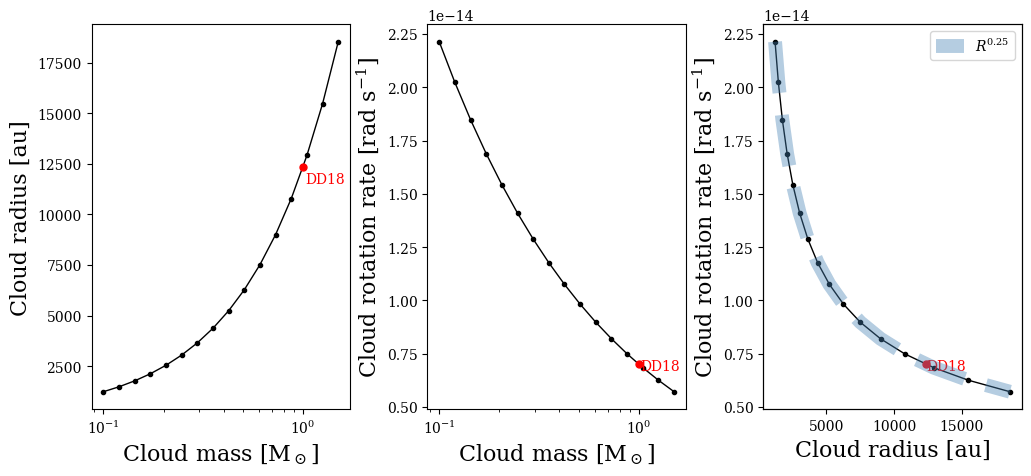

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))
# Radius VS mass
ax[0].semilogx(M_array/MS, R_array/au, 'k.-', lw=1)
ax[0].plot(1, Rcore_std/au, 'ro', markersize=5)
ax[0].text(1.02, Rcore_std/au*0.95, 'DD18', color='red', va='center')

# Omega VS Mass
ax[1].semilogx(M_array/MS, Omega_array, 'k.-', lw=1)
ax[1].plot(1., Omega_std, 'ro', markersize=5)
ax[1].text(1.02, Omega_std*0.99, 'DD18', color='red', va='center')

ax[2].plot(R_array/au, Omega_array, 'k.-', lw=1)
ax_JR = ax[2].twinx()
ax[2].plot(Rcore_std/au, Omega_std, 'ro', markersize=5)
ax[2].text(Rcore_std/au, Omega_std*0.99, 'DD18', color='red', va='center')
# Anayltical relation (Which we use)
ax_JR.plot(R_array/au, (R_array/au)**(-0.5), '--', color='steelblue', label=r'$R^{0.25}$', alpha=0.4, zorder=-1, lw=10)

ax_JR.legend()
ax_JR.set_yticks([])

ax[0].set_ylabel(r'Cloud radius [au]')
ax[2].set_ylabel(r'Cloud radius [au]')
ax[0].set_xlabel(r'Cloud mass [M$_\odot$]')
ax[1].set_xlabel(r'Cloud mass [M$_\odot$]')
ax[1].set_ylabel(r'Cloud rotation rate [rad s$^{-1}$]')
ax[2].set_ylabel(r'Cloud rotation rate [rad s$^{-1}$]')
ax[2].set_xlabel(r'Cloud radius [au]')

xticks = np.array([0.6, 0.8, 1, 1.2, 1.5])
# [axis.set_xticks(xticks, np.astype(xticks, str)) for axis in ax[:2]]

fig.subplots_adjust(wspace=0.3)

# Observations - Chen & Ostriker 2018

In [6]:
import pandas as pd
CO18 = pd.read_csv('/Users/jwilliams/Documents/Github_Repos/DD-diskevol/data/chen-ostriker.csv')

pc = c.pc.cgs.value
import astropy.units as u


def find_J(Omega, R):
    '''
    Returns specific angular momentum of cloud in units of pc km/s
    '''
    # Convert to right units with astropy hell yeah
    J = Omega * R**2
    J_u = J * u.cm * u.cm / u.s
    J_CO = J_u.to(u.pc * u.km / u.s)
    return J_CO


<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\o'
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_63672/3759326465.py:18: SyntaxWarning: invalid escape sequence '\c'
  ax[0].set_ylabel('J [pc$\cdot$kms$^{-1}$]')
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_63672/3759326465.py:24: SyntaxWarning: invalid escape sequence '\o'
  ax[1].set_xlabel('M [M$_\odot$]')


Text(0.5, 0, 'M [M$_\\odot$]')

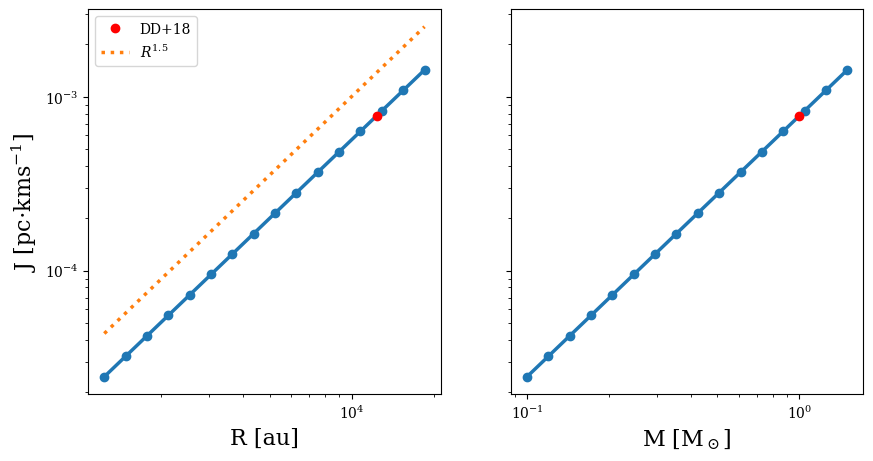

In [7]:
# Cloud properties
T = 10
cs = np.sqrt(kb * T / (mu * mp))

# Now scale J according to radius and back-calculate Omega
J_rescaled = rescale_J(R_array, Rcore_std, Omega_std, units='any')
j_DD18 = rescale_J(Rcore_std, Rcore_std, Omega_std, units='any') # DD18

# Do it in cgs
J_rescaled_CGS = rescale_J(R_array, Rcore_std, Omega_std)
new_Omega = J_rescaled_CGS / R_array**2

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,5))
ax[0].loglog(R_array/au, J_rescaled, 'o-')
ax[0].plot(Rcore_std/au, j_DD18, 'ro', label='DD+18')
ax[0].loglog(R_array/au, (R_array/au)**1.5 / 1e9, linestyle='dotted', label='$R^{1.5}$')
ax[0].set_xlabel('R [au]')
ax[0].set_ylabel('J [pc$\cdot$kms$^{-1}$]')
ax[0].legend()


ax[1].loglog(M_array/MS, J_rescaled, 'o-')
ax[1].plot(1, j_DD18, 'ro', label='DD+18')
ax[1].set_xlabel('M [M$_\odot$]')

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:45: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:45: SyntaxWarning: invalid escape sequence '\o'
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_63672/1143734826.py:11: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('$J$ ($=L/M$) [pc$\cdot$kms$^{-1}$]')
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_63672/1143734826.py:45: SyntaxWarning: invalid escape sequence '\o'
  ax_m.set_xlabel('Cloud mass [M$_\odot$]')
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_63672/1143734826.py:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.loglog(CO18['x'], CO18['y'], 'o', label='Chen & Ostriker 2018', color='tab:blue', alpha=0.2)


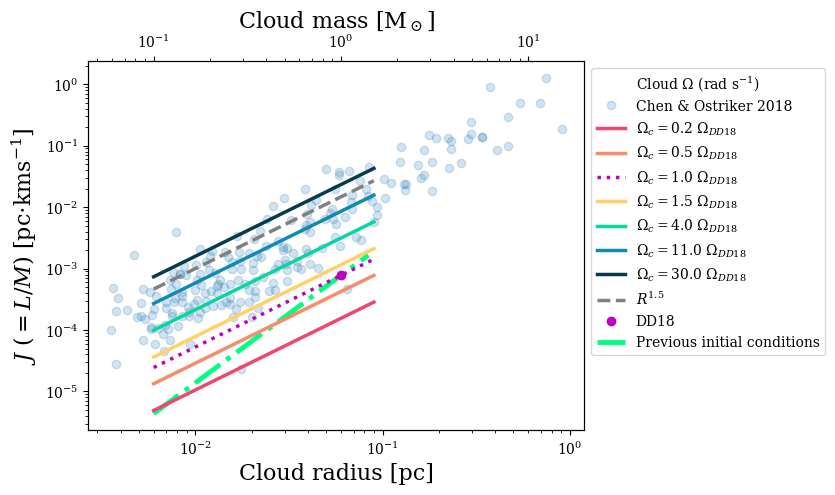

In [8]:


colors = ["ef476f","f78c6b","ffd166","06d6a0","118ab2","073b4c"]
colors = np.array(['#' + clr for clr in colors])
linestyles = np.array(['-', '-', '-', '-', '-', '-'], dtype=str)

fig, ax = plt.subplots()
# Legend trickery
ax.plot(0,0, alpha=0, label='Cloud $\\Omega$ (rad s$^{-1}$)')

# Plot Chen & Ostriker 2018
ax.loglog(CO18['x'], CO18['y'], 'o', label='Chen & Ostriker 2018', color='tab:blue', alpha=0.2)
ax.set_ylabel('$J$ ($=L/M$) [pc$\cdot$kms$^{-1}$]')
ax.set_xlabel('Cloud radius [pc]')


# Omega values to cycle over
baseline_omega = np.geomspace((7e-15/5), (7e-15 *30), 6)
iDD18 = baseline_omega.searchsorted(7e-15, side='left')
baseline_omega = np.insert(baseline_omega, iDD18, 7e-15)
colors = np.insert(colors, iDD18, 'm')
linestyles = np.insert(linestyles, iDD18, ":")


# Plot J-R relation for given Omega values
for omega_base, clr, ls in zip(baseline_omega, colors, linestyles):
    # Only changing omega as the baseline; still 1 MS cloud
    Omega = calc_Omega(R_array, rbase=Rcore_std, omega_base=omega_base)
    J = find_J(Omega, R_array)
    R_u = (R_array * u.cm).to(u.pc)   # Convert to parsecs

    ax.plot(R_u, J, label=f'$\\Omega_{{c}}=${omega_base/Omega_std:.1f} $\\Omega_{{DD18}}$', color=clr, linestyle=ls)


# Plot R^1.5
ax.plot(R_u, R_u**1.5, linestyle='dashed', color='gray', label='$R^{1.5}$')

# Plot DD18 exactly
ax.plot(Rcore_std/pc, j_DD18, 'mo', label='DD18')

# Make new axis on top for mass
ax_m = ax.twiny()
R_lims = np.array(ax.get_xlim()) * pc
M_lims = 2 * cs **2 * R_lims / G / MS
ax_m.set_xlim(M_lims)
ax_m.set_xscale('log')
ax_m.set_xlabel('Cloud mass [M$_\odot$]')


# Now we overplot the old values we were using for comparison...
old_omega = np.array([3.94e-15, 5.18e-15, 5.88e-15, 6.62e-15, 7e-15, 7.3e-15, 7.6e-15])
old_mass = np.array([0.1, 0.3, 0.5, 0.8, 1., 1.2, 1.4]) * MS
old_rad = Rcore(old_mass)
old_J = find_J(old_omega, old_rad)

ax.plot((old_rad * u.cm).to(u.pc), old_J.to(u.pc * u.km / u.s), 'springgreen', lw=3.5, linestyle='dashdot', zorder=-1, label='Previous initial conditions')

ax.legend(bbox_to_anchor=(1,1))

<>:28: SyntaxWarning: invalid escape sequence '\o'
<>:30: SyntaxWarning: invalid escape sequence '\O'
<>:28: SyntaxWarning: invalid escape sequence '\o'
<>:30: SyntaxWarning: invalid escape sequence '\O'
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_63672/3317758835.py:28: SyntaxWarning: invalid escape sequence '\o'
  ax[0].set_xlabel('M [$M_\odot$]')
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_63672/3317758835.py:30: SyntaxWarning: invalid escape sequence '\O'
  ax[2].set_xlabel('$\Omega_{\\rm{cloud}}$ [rads$^{-1}$]')
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_63672/3317758835.py:16: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  ax[0].loglog(M_array/MS, Rcentr/au, ' ', color=clr, linestyle=ls, label=label)
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_63672/3317758835.py:17: UserWarning: linestyle is redund

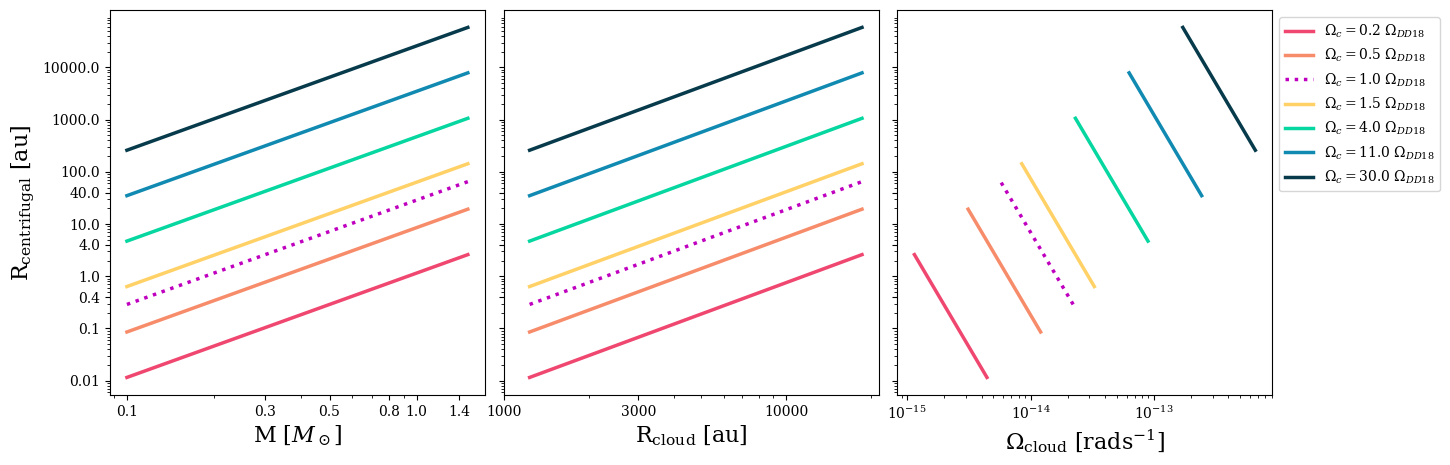

In [9]:
def calc_Rcentr(Omega, R, M):
    return Omega**2 * R**4 / (G*M)


fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

plot_all = True

if plot_all:
    for omega_base, clr, ls in zip(baseline_omega, colors, linestyles):
        Omega = calc_Omega(R_array, rbase=Rcore_std, omega_base=omega_base)
        Rcentr = calc_Rcentr(Omega, R_array, M_array)

        label=f'$\\Omega_{{c}}=${omega_base/Omega_std:.1f} $\\Omega_{{DD18}}$'

        ax[0].loglog(M_array/MS, Rcentr/au, ' ', color=clr, linestyle=ls, label=label)
        ax[1].loglog(R_array/au, Rcentr/au, ' ', color=clr, linestyle=ls, label=label)
        ax[2].loglog(Omega, Rcentr/au, ' ', color=clr, linestyle=ls, label=label)
else:
    Rcentr = calc_Rcentr(Omega_array, R_array, M_array)
    # print(Rcentr)
    label=f'$\\Omega_{{c}}=${omega_base/Omega_std:.1f} $\\Omega_{{DD18}}$'
    ax[0].loglog(M_array/MS, Rcentr/au, ' ', color=clr, linestyle=ls, label=label)
    ax[1].loglog(R_array/au, Rcentr/au, ' ', color=clr, linestyle=ls, label=label)
    ax[2].loglog(Omega_array, Rcentr/au, ' ', color=clr, linestyle=ls, label=label)


ax[0].set_xlabel('M [$M_\odot$]')
ax[1].set_xlabel('R$_{\\rm{cloud}}$ [au]')
ax[2].set_xlabel('$\Omega_{\\rm{cloud}}$ [rads$^{-1}$]')
ax[0].set_ylabel('R$_{\\rm{centrifugal}}$ [au]')

if plot_all:
    yticks = np.array([0.01, 0.1, 0.4, 1, 4, 10, 40, 100, 1000, 10000])
else:
    yticks = np.array([0.3, 0.5, 1, 2, 4, 6, 8, 10, 20, 30, 40, 70])
ax[0].set_yticks(yticks)
ax[0].set_yticklabels(np.astype(yticks, str))
# ax[0].set_ylim(7, 70)

mticks = np.array([0.1, 0.3, 0.5, 0.8, 1, 1.4])
ax[0].set_xticks(mticks)
ax[0].set_xticklabels(np.astype(mticks, str))

rticks = np.array([1000, 3000, 10000])
ax[1].set_xticks(rticks)
ax[1].set_xticklabels(np.astype(rticks, str))
fig.subplots_adjust(wspace=0.05)
# rticks = np.array()

discord = False  # If true, just plot the R-mass panel
if discord:
    ax[0].legend(bbox_to_anchor=(1,1))
    ax[1].remove()
    ax[2].remove()
else:
    ax[2].legend(bbox_to_anchor=(1,1))

# Create initial conditions parameter files

In [10]:
'''stars = np.load('DD-diskevol-stellar-properties.npz')
mvals = stars['M'] * MS
rvals = Rcore(mvals)
ovals = calc_Omega(rvals)
# Stellar properties - teff and radius
star_tvals = stars['T']
star_rvals = stars['R'] * RS

for i, (r, m, o, rstar, tstar) in enumerate(zip(rvals, mvals, ovals, star_rvals, star_tvals)):
    print(f'N={i+1}\nValues:\n\tM={m/MS}\n\tR={r/au}\n\tOmega={o}\n\tR*={rstar/RS}\n\tTeff={tstar}\n------------')

'''

"stars = np.load('DD-diskevol-stellar-properties.npz')\nmvals = stars['M'] * MS\nrvals = Rcore(mvals)\novals = calc_Omega(rvals)\n# Stellar properties - teff and radius\nstar_tvals = stars['T']\nstar_rvals = stars['R'] * RS\n\nfor i, (r, m, o, rstar, tstar) in enumerate(zip(rvals, mvals, ovals, star_rvals, star_tvals)):\n    print(f'N={i+1}\nValues:\n\tM={m/MS}\n\tR={r/au}\n\tOmega={o}\n\tR*={rstar/RS}\n\tTeff={tstar}\n------------')\n\n"

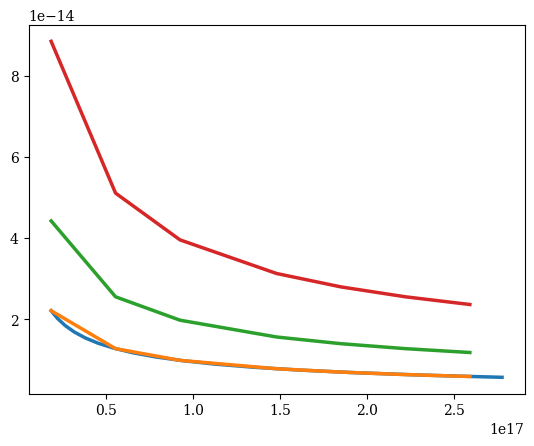

In [11]:
normal_omega = calc_Omega(R_array, rbase=Rcore_std, omega_base=Omega_std)
big_omega    = calc_Omega(R_array, rbase=Rcore_std, omega_base=Omega_std*2)
huge_omega   = calc_Omega(R_array, rbase=Rcore_std, omega_base=Omega_std*4)

stars = np.load('DD-diskevol-stellar-properties.npz')
mass_vals  = stars['M'] * MS    # Cloud mass
rad_vals   = Rcore(mass_vals)   # Cloud radius
# Cloud omega
normal_omega = calc_Omega(rad_vals, rbase=Rcore_std, omega_base=Omega_std)
big_omega    = calc_Omega(rad_vals, rbase=Rcore_std, omega_base=Omega_std*2)
huge_omega   = calc_Omega(rad_vals, rbase=Rcore_std, omega_base=Omega_std*4)

star_temp_vals = stars['T']
star_rad_vals  = stars['R'] * RS

plt.plot(R_array, Omega_array)
plt.plot(rad_vals, normal_omega)
plt.plot(rad_vals, big_omega)
plt.plot(rad_vals, huge_omega)

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_63672/2618892772.py:3: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('Cloud mass [M$_\odot$]')


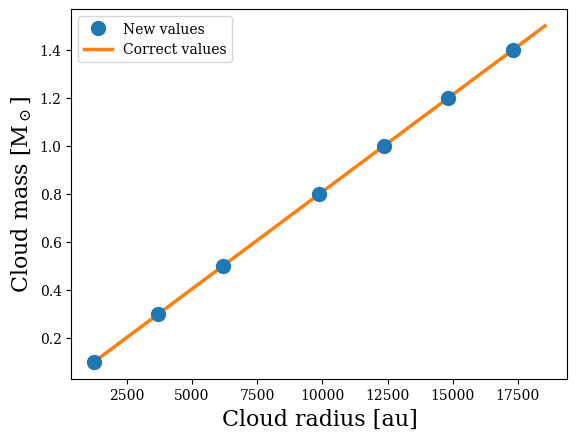

In [12]:
plt.plot(rad_vals/au, mass_vals/MS, 'o', markersize=10, label='New values')
plt.plot(R_array/au, M_array/MS, zorder=-1, label='Correct values')
plt.ylabel('Cloud mass [M$_\odot$]')
plt.xlabel('Cloud radius [au]')
plt.legend()

<>:15: SyntaxWarning: invalid escape sequence '\O'
<>:15: SyntaxWarning: invalid escape sequence '\O'
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_63672/2606173215.py:15: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('$\Omega_{\\rm{cloud}}$ [rads$^{-1}$]')
/var/folders/rq/3x6pyqhd1qdffd3v4tvhyd4c07n5lh/T/ipykernel_63672/2606173215.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  plt.loglog(Omega, Rcentr/au, ' ', color=clr, linestyle=ls, label=label)


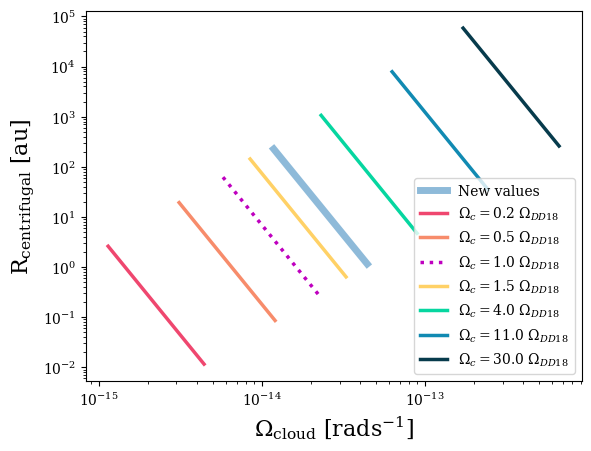

In [19]:
plt.figure()
Rcentr_huge = calc_Rcentr(big_omega, rad_vals, mass_vals)
plt.loglog(big_omega, Rcentr_huge/au, lw=5, alpha=0.5, label='New values')

# Plot the correct scalings to compare
for omega_base, clr, ls in zip(baseline_omega, colors, linestyles):
    Omega = calc_Omega(R_array, rbase=Rcore_std, omega_base=omega_base)
    # J = find_J(Omega, R_array)
    Rcentr = calc_Rcentr(Omega, R_array, M_array)
    label=f'$\\Omega_{{c}}=${omega_base/Omega_std:.1f} $\\Omega_{{DD18}}$'
    
    plt.loglog(Omega, Rcentr/au, ' ', color=clr, linestyle=ls, label=label)


plt.xlabel('$\Omega_{\\rm{cloud}}$ [rads$^{-1}$]')
plt.ylabel('R$_{\\rm{centrifugal}}$ [au]')
plt.legend()


In [14]:
# Make the parameter files
def write_parameters(mass_vals, omega_vals, star_rad_vals, star_temp_vals, prefix=None):

    str_1st = '''\
number_of_radial_zones                    1400
gas_to_dust                               100.
flaring_angle                             0.05
background_temperature                    10.
'''
    # Omega value goes here
    str_2nd = '''\
viscous_alpha                             1.d-3
dust_alpha                                1.d-5
'''
    # Mass value goes here
    # Save location goes here

    folders = []

    for i, (m, o, rstar, tstar) in enumerate(zip(mass_vals, omega_vals, star_rad_vals, star_temp_vals)):
        mass = f'{m/MS:.2f}'
        parameter_file_name = f'{prefix}{mass}.par'

        stellar_evol = True
        if stellar_evol:
            save_location = parameter_file_name[:-4] + '_stellar_evol'
        else:
            save_location = f'{mass}_{omega}'
        folders.append(save_location)

        # Format the values to save
        omega = f'{o:.4e}'.split('e')
        omega_val = omega[0]+'d'+omega[1]   # Convert to fortran format
        mass_val = f'{m/MS:.4f}'

        omega_str      = f'cloud_omega                               {omega_val}'
        mass_str       = f'cloud_mass                                {mass_val}'
        mass_str       = f'cloud_mass                                {mass_val}'
        tstar_str      = f'star_temperature                          {tstar}'
        rstar_str      = f'star_radius                               {rstar/RS}'
        save_str       = f'save_location                             {save_location}'
        string = str_1st + omega_str + '\n' + str_2nd + mass_str + '\n' + tstar_str + '\n' + rstar_str + '\n' + save_str + '\n'     # Append into a parameter file string

        with open('parameter_files/'+parameter_file_name, 'w', encoding='utf-8') as f:
            f.write(string)

    # Save all the data folder names into a file to mkdir with them later
    with open('folders.info', 'w', encoding='utf-8') as f: 
        for folder in folders:
            f.write(folder+'\n')

    # Tests
    with open('folders.info', 'r') as f:
        content = f.readlines()
        print(content)

In [15]:
write_parameters(mass_vals, normal_omega, star_rad_vals, star_temp_vals, prefix='normal_')

write_parameters(mass_vals, big_omega, star_rad_vals, star_temp_vals, prefix='big_') # Omega x2

write_parameters(mass_vals, huge_omega, star_rad_vals, star_temp_vals, prefix='huge_') # Omega x4

['normal_0.10_stellar_evol\n', 'normal_0.30_stellar_evol\n', 'normal_0.50_stellar_evol\n', 'normal_0.80_stellar_evol\n', 'normal_1.00_stellar_evol\n', 'normal_1.20_stellar_evol\n', 'normal_1.40_stellar_evol\n']
['big_0.10_stellar_evol\n', 'big_0.30_stellar_evol\n', 'big_0.50_stellar_evol\n', 'big_0.80_stellar_evol\n', 'big_1.00_stellar_evol\n', 'big_1.20_stellar_evol\n', 'big_1.40_stellar_evol\n']
['huge_0.10_stellar_evol\n', 'huge_0.30_stellar_evol\n', 'huge_0.50_stellar_evol\n', 'huge_0.80_stellar_evol\n', 'huge_1.00_stellar_evol\n', 'huge_1.20_stellar_evol\n', 'huge_1.40_stellar_evol\n']


In [16]:
GPE  = (3/5) * G * M**2 / R
# GPE = 4 * cs**4 / G * np.log(R) - np.log(1e-10)
TE   = (3/2) * M/(mu*mp) * kb * T
I    = (2/5) * M * R**2  # Solid sphere moment of inertia
Erot = 1/2 * I * Omega**2

TE_DD = (3/2) * MS/(mu*mp) * kb * T
GPE_DD = (3/5) * G * MS**2 / Rcore(MS)
I_DD = (2/5) * MS * Rcore(MS)**2
Erot_DD = 1/2 * I_DD * Omega_std**2

alpha = TE / GPE
beta = Erot / GPE

alpha_DD = TE_DD / GPE_DD
beta_DD = Erot_DD / GPE_DD

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(8, 5))

ax[0].semilogx(M/MS, alpha, 'k.-', lw=1)
ax[0].plot(1, alpha_DD, 'ro', markersize=5)
ax[0].text(1, alpha_DD-0.005, 'DD18', color='red', va='center')
ax[0].set_ylabel(r'$\alpha=E_{\rm{Therm}}/U_{\rm{GPE}}$')
ax[0].set_xlabel(r'Cloud mass [M$_\odot$]')

ax[1].loglog(M/MS, beta, 'k.-', lw=1)
ax[1].plot(1, beta_DD, 'ro', markersize=5)
ax[1].text(1, beta_DD*0.9, 'DD18', color='red', va='center')
ax[1].set_ylabel(r'$\beta=E_{\rm{Rot}}/U_{\rm{GPE}}$')

# [axis.set_xticks(xticks, np.astype(xticks, str)) for axis in ax]
fig.subplots_adjust(wspace=0.4)

NameError: name 'M' is not defined